In this notebook we will explore the Lorenz Attractor. We list several new functions for the development of Lorenz attractor images and animations. We hope to achieve an advanced simulation with cool graphics. Want to make something trippy. 

# Initialization

In [1]:
# ffmpeg -start_number 0 -framerate 60 -i graph%01d.png -vf "scale=1280:720" video.webm

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from matplotlib import cm
from matplotlib.animation import FuncAnimation
import matplotlib as mpl

In [3]:
#We have this cell here to call the dataAnalysisLibrary module from one place rather than copy pasting into many other places
#The path here is my own path, will need to change it for whoever is using
#Want to find a way to do this automatically so the reader doesnt have to worry about it

sys.path.insert(0,'C:/Users/darkb/Documents/Uidaho Classes/CS shit/Physics-Simulations/Code/')
import simulationLibrary as sim

In [4]:
# clearDirectory() just clearned the "Images for simulation" directory so that we can save over it without any overlap
def clearDirectory(direc='C:/Users/darkb/Documents/Uidaho Classes/CS shit/Physics-Simulations/Images for simulation/'):
    dir = direc
    for f in os.listdir(dir):
        os.remove(os.path.join(dir, f))

# Lorenz Attractor

In [5]:
# Not my own code, got it from DrM at https://matplotlib.org/stable/gallery/mplot3d/lorenz_attractor.html     
def lorenz(xyz, s=10, r=28, b=2.667):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])

In [72]:
# lorenzAttractorImage() produces an image of a Lorenz Attractor System after 'length' amount of iterations. Also takes system parameters s, r, and b. Default value is just a known value that gives a known result to use as sanity checks
# 'save' parameter allows you to save the image incase you find something cool
def lorenzAttractorImage(length, s=10, r=28, b=2.667, save=False, clean=False, initPos=np.array([0,1,1.05])):
    dt = 0.01
    num_steps = length

    xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
    xyzs[0] = initPos  # Set initial values
    # Step through "time", calculating the partial derivatives at the current point
    # and using them to estimate the next point
    for i in range(num_steps):
        xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i],s,r,b) * dt

    # Plot
    ax = plt.figure().add_subplot(projection='3d')

    ax.plot(*xyzs.T, lw=0.5)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    ax.text2D(0.05, 0.95, r"$\sigma$="+str("{:.2f}".format(s)), transform=ax.transAxes)
    ax.text2D(0.05, 1.0, r"$\rho$="+str("{:.2f}".format(r)), transform=ax.transAxes)
    ax.text2D(0.05, 1.05, r"$\beta$="+str("{:.2f}".format(b)), transform=ax.transAxes)
    ax.text2D(0.75, 0.95, r"$x$="+str("{:.3f}".format(xyzs[0][0])), transform=ax.transAxes)
    ax.text2D(0.75, 1.0, r"$y$="+str("{:.2f}".format(xyzs[0][1])), transform=ax.transAxes)
    ax.text2D(0.75, 1.05, r"$z$="+str("{:.2f}".format(xyzs[0][2])), transform=ax.transAxes)
    plt.xlim((-25,25))
    plt.ylim((-30,35))
    if clean == True:
        ax.grid(None)
        ax.axis('off')
    else:
        ax.set_title("Lorenz Attractor")
        pass
    
    if save == True:
        plt.savefig('./Images for simulation/graph'+str(j)+'.png', dpi=300)
        plt.close('all')
    else:
        plt.show()

In [77]:
# lorenzAttractorTrace() takes in the amount of frames you want to video to be along with the system paramters s, r and b. Default value is just a known value that gives a known result to use as sanity checks
# Will save images to target directory where you will then have to run ffmpeg through the command line to use. Ffmpeg comand is given in the next line
# ffmpeg -start_number 0 -framerate 60 -i graph%01d.png video.webm

def lorenzAttractorTrace(frames, s=10, r=28, b=2.667, clean=False, rotation=False,initPos=np.array([0,1,1.05])):
    #Empty the target directory
    clearDirectory()

    #Calculate the array of points according to the lorenz system
    #Do this outside the main loop so that we only calculate it once rather than a bazillion times and annihilate memory
    dt = 0.01
    numSteps = frames

    xyzs = np.empty((numSteps+1, 3))  # Need one more for the initial values
    xyzs[0] = initPos  # Set initial values
    for i in range(numSteps):
        xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i],s,r,b) * dt

    # Checking if the attractor is clean or not to determine what the first frame should look like     
    if clean == True:
        #plot the first frame outside of the main loop, same idea as initial conditions just with a frame
        ax = plt.figure().add_subplot(projection='3d')
        ax.plot(*xyzs[0].T, lw=0.5)
        ax.set_xlabel("X Axis")
        ax.set_ylabel("Y Axis")
        ax.set_zlabel("Z Axis")
        ax.grid(None)
        ax.axis('off')
        plt.savefig('C:/Users/darkb/Documents/Uidaho Classes/CS shit/Physics-Simulations/Images for simulation/graph.png'+str(0)+'.png')
        plt.close('all')
    else:
        #plot the first frame outside of the main loop, same idea as initial conditions just with a frame
        ax = plt.figure().add_subplot(projection='3d')
        ax.plot(*xyzs[0].T, lw=0.5)
        ax.set_xlabel("X Axis")
        ax.set_ylabel("Y Axis")
        ax.set_zlabel("Z Axis")
        ax.set_title("Lorenz Attractor")
        plt.savefig('C:/Users/darkb/Documents/Uidaho Classes/CS shit/Physics-Simulations/Images for simulation/graph.png'+str(0)+'.png')
        plt.close('all')
    
    #Non-rotation video
    if rotation == False:
        #Initialize frame to 1 so that our indexing for xyzs in the main loop prints from 0-frame. If frame was 0 then we would be plotting xysz from xyzs[0] ot xyzs[0] which we cant do. We need atleast xyzs[0] to xyzs[1]
        frame = 1
        while frame < numSteps:
            ax = plt.figure().add_subplot(projection='3d')
            ax.plot(*xyzs[:frame].T, lw=0.5) #Recall this [:frame] notion means we plot the array from xyzs[0] to xyzs[frame]
            ax.set_xlabel("X Axis")
            ax.set_ylabel("Y Axis")
            ax.set_zlabel("Z Axis")
            plt.xlim((-25,25))
            plt.ylim((-30,35))
            ax.set_zlim(0,60)
            if clean == True:
                ax.grid(None)
                ax.axis('off')
            else:
                ax.set_title("Lorenz Attractor")
                pass
            plt.savefig('C:/Users/darkb/Documents/Uidaho Classes/CS shit/Physics-Simulations/Images for simulation/graph.png'+str(frame)+'.png', dpi=300) # dpi argument increases resolution
            plt.close('all')
            frame = frame + 1
    #Rotation video, add in the ax.view_init() function which takes in spherical coordinate
    else:
        #Initialize frame to 1 so that our indexing for xyzs in the main loop prints from 0-frame. If frame was 0 then we would be plotting xysz from xyzs[0] ot xyzs[0] which we cant do. We need atleast xyzs[0] to xyzs[1]
        frame = 1
        angle = 0
        while frame < numSteps:
            ax = plt.figure().add_subplot(projection='3d')
            ax.plot(*xyzs[:frame].T, lw=0.5) #Recall this [:frame] notion means we plot the array from xyzs[0] to xyzs[frame]
            ax.set_xlabel("X Axis")
            ax.set_ylabel("Y Axis")
            ax.set_zlabel("Z Axis")
            plt.xlim((-25,25))
            plt.ylim((-30,35))
            ax.set_zlim(0,60)
            ax.view_init(30,angle)
            if clean == True:
                ax.grid(None)
                ax.axis('off')
            else:
                ax.set_title("Lorenz Attractor")
                pass
            plt.savefig('C:/Users/darkb/Documents/Uidaho Classes/CS shit/Physics-Simulations/Images for simulation/graph.png'+str(frame)+'.png', dpi=300) # dpi argument increases resolution
            plt.close('all')
            frame = frame + 1
            angle = angle + 1

In [78]:
lorenzAttractorTrace(200)

# Thomas Attractor

In [33]:
def thomas(xyz, b=0.208186):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = np.sin(y)-(b*x)
    y_dot = np.sin(z)-(b*y)
    z_dot = np.sin(x)-(b*z)
    return np.array([x_dot, y_dot, z_dot])

In [36]:
# lorenzAttractorImage() produces an image of a Lorenz Attractor System after 'length' amount of iterations. Also takes system parameters s, r, and b. Default value is just a known value that gives a known result to use as sanity checks
# 'save' parameter allows you to save the image incase you find something cool
def thomasAttractorImage(length, b=0.208186, save=False, clean=False, initPos=np.array([0,0,0])):
    dt = 0.01
    num_steps = length

    xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
    xyzs[0] = initPos  # Set initial values
    # Step through "time", calculating the partial derivatives at the current point
    # and using them to estimate the next point
    for i in range(num_steps):
        xyzs[i + 1] = xyzs[i] + thomas(xyzs[i],b) * dt

    # Plot
    ax = plt.figure().add_subplot(projection='3d')

    ax.plot(*xyzs.T, lw=0.5)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    # ax.text2D(0.05, 0.95, r"$\sigma$="+str("{:.2f}".format(s)), transform=ax.transAxes)
    # ax.text2D(0.05, 1.0, r"$\rho$="+str("{:.2f}".format(r)), transform=ax.transAxes)
    # ax.text2D(0.05, 1.05, r"$\beta$="+str("{:.2f}".format(b)), transform=ax.transAxes)
    # ax.text2D(0.75, 0.95, r"$x$="+str("{:.3f}".format(xyzs[0][0])), transform=ax.transAxes)
    # ax.text2D(0.75, 1.0, r"$y$="+str("{:.2f}".format(xyzs[0][1])), transform=ax.transAxes)
    # ax.text2D(0.75, 1.05, r"$z$="+str("{:.2f}".format(xyzs[0][2])), transform=ax.transAxes)
    plt.xlim((-5,5))
    plt.ylim((-5,5))
    # plt.zlim((-5,5))
    if clean == True:
        ax.grid(None)
        ax.axis('off')
    else:
        ax.set_title("Thomas Attractor")
        pass
    
    if save == True:
        plt.savefig('C:/Users/darkb/Documents/Uidaho Classes/CS shit/Physics-Simulations/Images for simulation/graph.png', dpi=300)
        plt.close('all')
    else:
        plt.show()

In [41]:
thomasAttractorImage(100000, save=True, initPos = np.array([1,-1,0]))

# Rossler Attractor

In [5]:
def rossler(xyz, a=0.2, b=0.2, c=5.7):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = -y-z
    y_dot = x+(a*y)
    z_dot = b+(z*(x-c))
    return np.array([x_dot, y_dot, z_dot])

In [6]:
# lorenzAttractorImage() produces an image of a Lorenz Attractor System after 'length' amount of iterations. Also takes system parameters s, r, and b. Default value is just a known value that gives a known result to use as sanity checks
# 'save' parameter allows you to save the image incase you find something cool
def rosslerAttractorImage(length, a=0.2, b=0.2, c=5.7, save=False, clean=False, initPos=np.array([0,0,0])):
    dt = 0.01
    num_steps = length

    xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
    xyzs[0] = initPos  # Set initial values
    # Step through "time", calculating the partial derivatives at the current point
    # and using them to estimate the next point
    for i in range(num_steps):
        xyzs[i + 1] = xyzs[i] + rossler(xyzs[i],b) * dt

    # Plot
    ax = plt.figure().add_subplot(projection='3d')

    ax.plot(*xyzs.T, lw=0.5)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    # ax.text2D(0.05, 0.95, r"$\sigma$="+str("{:.2f}".format(s)), transform=ax.transAxes)
    # ax.text2D(0.05, 1.0, r"$\rho$="+str("{:.2f}".format(r)), transform=ax.transAxes)
    # ax.text2D(0.05, 1.05, r"$\beta$="+str("{:.2f}".format(b)), transform=ax.transAxes)
    # ax.text2D(0.75, 0.95, r"$x$="+str("{:.3f}".format(xyzs[0][0])), transform=ax.transAxes)
    # ax.text2D(0.75, 1.0, r"$y$="+str("{:.2f}".format(xyzs[0][1])), transform=ax.transAxes)
    # ax.text2D(0.75, 1.05, r"$z$="+str("{:.2f}".format(xyzs[0][2])), transform=ax.transAxes)
    plt.xlim((-12,12))
    plt.ylim((-12,12))
    # plt.zlim((-5,5))
    if clean == True:
        ax.grid(None)
        ax.axis('off')
    else:
        ax.set_title("Thomas Attractor")
        pass
    
    if save == True:
        plt.savefig('C:/Users/darkb/Documents/Uidaho Classes/CS shit/Physics-Simulations/Images for simulation/graph.png', dpi=300)
        plt.close('all')
    else:
        plt.show()

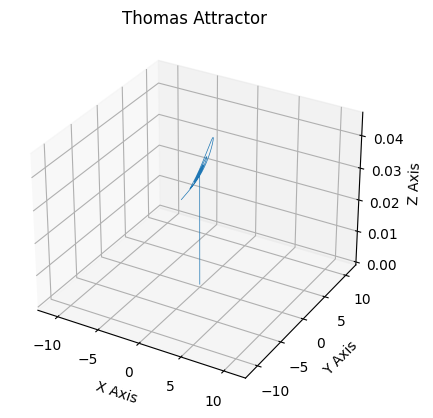

In [7]:
rosslerAttractorImage(4000)

In [8]:
# lorenzAttractorTrace() takes in the amount of frames you want to video to be along with the system paramters s, r and b. Default value is just a known value that gives a known result to use as sanity checks
# Will save images to target directory where you will then have to run ffmpeg through the command line to use. Ffmpeg comand is given in the next line
# ffmpeg -start_number 0 -framerate 60 -i graph%01d.png video.webm

def rosslerAttractorTrace(frames, a=0.2, b=0.2, c=10, clean=False, rotation=False,initPos=np.array([0,0,0])):
    #Empty the target directory
    clearDirectory()

    #Enable latex
    mpl.rcParams['font.size'] = 20
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'

    #Calculate the array of points according to the lorenz system
    #Do this outside the main loop so that we only calculate it once rather than a bazillion times and annihilate memory
    dt = 0.01
    numSteps = 25*frames

    xyzs = np.empty((numSteps+1, 3))  # Need one more for the initial values
    xyzs[0] = initPos  # Set initial values
    for i in range(numSteps):
        xyzs[i + 1] = xyzs[i] + rossler(xyzs[i]) * dt

    # Checking if the attractor is clean or not to determine what the first frame should look like     
    if clean == True:
        #plot the first frame outside of the main loop, same idea as initial conditions just with a frame
        ax = plt.figure().add_subplot(projection='3d')
        ax.plot(*xyzs[0].T, lw=0.5)
        ax.set_xlabel("X Axis")
        ax.set_ylabel("Y Axis")
        ax.set_zlabel("Z Axis")
        ax.grid(None)
        ax.axis('off')
        plt.savefig('C:/Users/darkb/Documents/Uidaho Classes/CS shit/Physics-Simulations/Images for simulation/graph'+str(0)+'.png')
        plt.close('all')
    else:
        #plot the first frame outside of the main loop, same idea as initial conditions just with a frame
        ax = plt.figure().add_subplot(projection='3d')
        ax.plot(*xyzs[0].T, lw=0.5)
        ax.set_xlabel("X Axis")
        ax.set_ylabel("Y Axis")
        ax.set_zlabel("Z Axis")
        ax.set_title("Rossler Attractor")
        plt.savefig('C:/Users/darkb/Documents/Uidaho Classes/CS shit/Physics-Simulations/Images for simulation/graph'+str(0)+'.png')
        plt.close('all')
    
    #Non-rotation video
    if rotation == False:
        #Initialize frame to 1 so that our indexing for xyzs in the main loop prints from 0-frame. If frame was 0 then we would be plotting xysz from xyzs[0] ot xyzs[0] which we cant do. We need atleast xyzs[0] to xyzs[1]
        frame = 1
        while frame < numSteps/25:
            ax = plt.figure(figsize=(8,6)).add_subplot(projection='3d')
            ax.plot(*xyzs[:(frame*25)].T, lw=0.5) #Recall this [:frame] notion means we plot the array from xyzs[0] to xyzs[frame]
            ax.text2D(0.3,1, "Rossler Attractor", transform=ax.transAxes)
            ax.text2D(0,0.85, r"$\frac{d}{dx} \begin{bmatrix} x \\ y \\ z \end{bmatrix}=\begin{bmatrix} 0 & -1 & -1 \\  1 & \alpha & 0 \\ z & 0 & -\gamma \end{bmatrix}\begin{bmatrix} x \\ y \\z \end{bmatrix}+\begin{bmatrix}0 \\ 0 \\ \beta \end{bmatrix}$", transform=ax.transAxes)
            ax.text2D(-0.2, 0.65, "Paramaters:", transform=ax.transAxes)
            ax.text2D(-0.2, 0.55, r"$a$="+str("{:.2f}".format(a)), transform=ax.transAxes)
            ax.text2D(-0.2, 0.45, r"$b$="+str("{:.2f}".format(b)), transform=ax.transAxes)
            ax.text2D(-0.2, 0.35, r"$c$="+str("{:.2f}".format(c)), transform=ax.transAxes)
            ax.set_ylabel("Y Axis")
            ax.set_zlabel("Z Axis")
            plt.xlim((-12,12))
            plt.ylim((-12,12))
            ax.set_zlim(0,50)
            if clean == True:
                ax.grid(None)
                ax.axis('off')
            else:
                ax.set_title("Rossler Attractor")
                pass
            plt.savefig('C:/Users/darkb/Documents/Uidaho Classes/CS shit/Physics-Simulations/Images for simulation/graph'+str(frame)+'.png', dpi=300) # dpi argument increases resolution
            plt.close('all')
            frame = frame + 1
    #Rotation video, add in the ax.view_init() function which takes in spherical coordinate
    else:
        #Initialize frame to 1 so that our indexing for xyzs in the main loop prints from 0-frame. If frame was 0 then we would be plotting xysz from xyzs[0] ot xyzs[0] which we cant do. We need atleast xyzs[0] to xyzs[1]
        frame = 1
        angle = 0
        while frame < numSteps/25:
            ax = plt.figure(figsize=(8,6)).add_subplot(projection='3d')
            ax.plot(*xyzs[:(frame*25)].T, lw=0.5) #Recall this [:frame] notion means we plot the array from xyzs[0] to xyzs[frame]
            ax.text2D(0.3,1, "Rossler Attractor", transform=ax.transAxes)
            ax.text2D(0,0.85, r"$\frac{d}{dx} \begin{bmatrix} x \\ y \\ z \end{bmatrix}=\begin{bmatrix} 0 & -1 & -1 \\  1 & \alpha & 0 \\ z & 0 & -\gamma \end{bmatrix}\begin{bmatrix} x \\ y \\z \end{bmatrix}+\begin{bmatrix}0 \\ 0 \\ \beta \end{bmatrix}$", transform=ax.transAxes)
            ax.text2D(-0.2, 0.65, "Paramaters:", transform=ax.transAxes)
            ax.text2D(-0.2, 0.55, r"$a$="+str("{:.2f}".format(a)), transform=ax.transAxes)
            ax.text2D(-0.2, 0.45, r"$b$="+str("{:.2f}".format(b)), transform=ax.transAxes)
            ax.text2D(-0.2, 0.35, r"$c$="+str("{:.2f}".format(c)), transform=ax.transAxes)
            ax.set_ylabel("Y Axis")
            ax.set_zlabel("Z Axis")
            plt.xlim((-12,12))
            plt.ylim((-12,12))
            ax.set_zlim(0,50)
            ax.view_init(30,angle)
            if clean == True:
                ax.grid(None)
                ax.axis('off')
            else:
                ax.set_title("Rossler Attractor")
                pass
            plt.savefig('C:/Users/darkb/Documents/Uidaho Classes/CS shit/Physics-Simulations/Images for simulation/graph'+str(frame)+'.png', dpi=300) # dpi argument increases resolution
            plt.close('all')
            frame = frame + 1
            angle = angle + 1

In [9]:
rosslerAttractorTrace(1500, c=14, clean=True, rotation=False)

# Aizawa Atractor

In [38]:
def aizawa(xyz, a=0.95, b=0.7, c=0.6, d=3.5, e=0.25, f=0.1):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = ((z-b)*x)-(d*y)
    y_dot = (d*x)+(z-b)*y
    z_dot = c+(a*z)-((z**3)/3)-((x**2+y**2)*(1+e*z)+f*z*x**3)
    return np.array([x_dot, y_dot, z_dot])

In [39]:
# lorenzAttractorImage() produces an image of a Lorenz Attractor System after 'length' amount of iterations. Also takes system parameters s, r, and b. Default value is just a known value that gives a known result to use as sanity checks
# 'save' parameter allows you to save the image incase you find something cool
def aizawaAttractorImage(length, a=0.95, b=0.7, c=0.6, d=3.5, e=0.25, f=0.1, save=False, clean=False, initPos=np.array([0.15,1,0.015])):
    dt = 0.01
    num_steps = length

    xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
    xyzs[0] = initPos  # Set initial values
    # Step through "time", calculating the partial derivatives at the current point
    # and using them to estimate the next point
    for i in range(num_steps):
        xyzs[i + 1] = xyzs[i] + aizawa(xyzs[i],b) * dt

    # Plot
    ax = plt.figure().add_subplot(projection='3d')

    ax.plot(*xyzs.T, lw=0.5)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    # ax.text2D(0.05, 0.95, r"$\sigma$="+str("{:.2f}".format(s)), transform=ax.transAxes)
    # ax.text2D(0.05, 1.0, r"$\rho$="+str("{:.2f}".format(r)), transform=ax.transAxes)
    # ax.text2D(0.05, 1.05, r"$\beta$="+str("{:.2f}".format(b)), transform=ax.transAxes)
    # ax.text2D(0.75, 0.95, r"$x$="+str("{:.3f}".format(xyzs[0][0])), transform=ax.transAxes)
    # ax.text2D(0.75, 1.0, r"$y$="+str("{:.2f}".format(xyzs[0][1])), transform=ax.transAxes)
    # ax.text2D(0.75, 1.05, r"$z$="+str("{:.2f}".format(xyzs[0][2])), transform=ax.transAxes)
    plt.xlim((-2,2))
    plt.ylim((-2,2))
    # plt.zlim((-5,5))
    if clean == True:
        ax.grid(None)
        ax.axis('off')
    else:
        ax.set_title("Aizawa Attractor")
        pass
    
    if save == True:
        plt.savefig('C:/Users/darkb/Documents/Uidaho Classes/CS shit/Physics-Simulations/Images for simulation/graph.png', dpi=300)
        plt.close('all')
    else:
        plt.show()

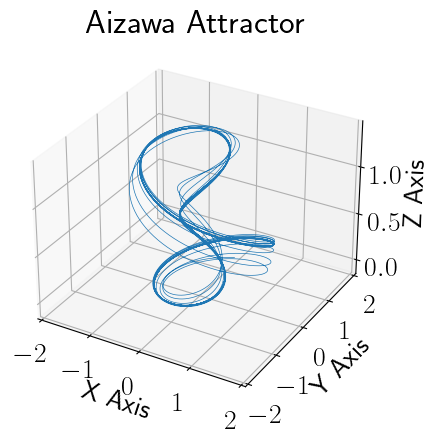

In [42]:
aizawaAttractorImage(10000)

In [51]:
# lorenzAttractorTrace() takes in the amount of frames you want to video to be along with the system paramters s, r and b. Default value is just a known value that gives a known result to use as sanity checks
# Will save images to target directory where you will then have to run ffmpeg through the command line to use. Ffmpeg comand is given in the next line
# ffmpeg -start_number 0 -framerate 60 -i graph%01d.png video.webm

def aizawaAttractorTrace(frames, a=0.2, b=0.2, c=10, clean=False, rotation=False,initPos=np.array([0.1,1,0.01])):
    #Empty the target directory
    clearDirectory()

    #Enable latex
    mpl.rcParams['font.size'] = 20
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'

    #Calculate the array of points according to the lorenz system
    #Do this outside the main loop so that we only calculate it once rather than a bazillion times and annihilate memory
    dt = 0.01
    numSteps = 25*frames

    xyzs = np.empty((numSteps+1, 3))  # Need one more for the initial values
    xyzs[0] = initPos  # Set initial values
    for i in range(numSteps):
        xyzs[i + 1] = xyzs[i] + aizawa(xyzs[i]) * dt

    # Checking if the attractor is clean or not to determine what the first frame should look like     
    if clean == True:
        #plot the first frame outside of the main loop, same idea as initial conditions just with a frame
        ax = plt.figure().add_subplot(projection='3d')
        ax.plot(*xyzs[0].T, lw=0.5)
        ax.set_xlabel("X Axis")
        ax.set_ylabel("Y Axis")
        ax.set_zlabel("Z Axis")
        ax.grid(None)
        ax.axis('off')
        plt.savefig('C:/Users/darkb/Documents/Uidaho Classes/CS shit/Physics-Simulations/Images for simulation/graph'+str(0)+'.png')
        plt.close('all')
    else:
        #plot the first frame outside of the main loop, same idea as initial conditions just with a frame
        ax = plt.figure().add_subplot(projection='3d')
        ax.plot(*xyzs[0].T, lw=0.5)
        ax.set_xlabel("X Axis")
        ax.set_ylabel("Y Axis")
        ax.set_zlabel("Z Axis")
        ax.set_title("Rossler Attractor")
        plt.savefig('C:/Users/darkb/Documents/Uidaho Classes/CS shit/Physics-Simulations/Images for simulation/graph'+str(0)+'.png')
        plt.close('all')
    
    #Non-rotation video
    if rotation == False:
        #Initialize frame to 1 so that our indexing for xyzs in the main loop prints from 0-frame. If frame was 0 then we would be plotting xysz from xyzs[0] ot xyzs[0] which we cant do. We need atleast xyzs[0] to xyzs[1]
        frame = 1
        while frame < numSteps/25:
            ax = plt.figure(figsize=(8,6)).add_subplot(projection='3d')
            ax.plot(*xyzs[:(frame*25)].T, lw=0.5) #Recall this [:frame] notion means we plot the array from xyzs[0] to xyzs[frame]
            ax.text2D(0.3,1, "Rossler Attractor", transform=ax.transAxes)
            ax.text2D(0,0.85, r"$\frac{d}{dx} \begin{bmatrix} x \\ y \\ z \end{bmatrix}=\begin{bmatrix} 0 & -1 & -1 \\  1 & \alpha & 0 \\ z & 0 & -\gamma \end{bmatrix}\begin{bmatrix} x \\ y \\z \end{bmatrix}+\begin{bmatrix}0 \\ 0 \\ \beta \end{bmatrix}$", transform=ax.transAxes)
            ax.text2D(-0.2, 0.65, "Paramaters:", transform=ax.transAxes)
            ax.text2D(-0.2, 0.55, r"$a$="+str("{:.2f}".format(a)), transform=ax.transAxes)
            ax.text2D(-0.2, 0.45, r"$b$="+str("{:.2f}".format(b)), transform=ax.transAxes)
            ax.text2D(-0.2, 0.35, r"$c$="+str("{:.2f}".format(c)), transform=ax.transAxes)
            ax.set_ylabel("Y Axis")
            ax.set_zlabel("Z Axis")
            plt.xlim((-12,12))
            plt.ylim((-12,12))
            ax.set_zlim(0,50)
            if clean == True:
                ax.grid(None)
                ax.axis('off')
            else:
                ax.set_title("Rossler Attractor")
                pass
            plt.savefig('C:/Users/darkb/Documents/Uidaho Classes/CS shit/Physics-Simulations/Images for simulation/graph'+str(frame)+'.png', dpi=300) # dpi argument increases resolution
            plt.close('all')
            frame = frame + 1
    #Rotation video, add in the ax.view_init() function which takes in spherical coordinate
    else:
        #Initialize frame to 1 so that our indexing for xyzs in the main loop prints from 0-frame. If frame was 0 then we would be plotting xysz from xyzs[0] ot xyzs[0] which we cant do. We need atleast xyzs[0] to xyzs[1]
        frame = 1
        angle = 0
        while frame < numSteps/25:
            ax = plt.figure(figsize=(8,6)).add_subplot(projection='3d')
            ax.plot(*xyzs[:(frame*25)].T, lw=0.5) #Recall this [:frame] notion means we plot the array from xyzs[0] to xyzs[frame]
            ax.text2D(0.3,1, "Aizawa Attractor", transform=ax.transAxes)
            ax.text2D(0,0.85, r"$\frac{d}{dx} \begin{bmatrix} x \\ y \\ z \end{bmatrix}=\begin{bmatrix} (z-b) & -d & 0 \\  d & z-b & 0 \\ -x() & 0 & -\gamma \end{bmatrix}\begin{bmatrix} x \\ y \\z \end{bmatrix}+\begin{bmatrix}0 \\ 0 \\ \beta \end{bmatrix}$", transform=ax.transAxes)
            ax.text2D(-0.2, 0.65, "Paramaters:", transform=ax.transAxes)
            ax.text2D(-0.2, 0.55, r"$a$="+str("{:.2f}".format(a)), transform=ax.transAxes)
            ax.text2D(-0.2, 0.45, r"$b$="+str("{:.2f}".format(b)), transform=ax.transAxes)
            ax.text2D(-0.2, 0.35, r"$c$="+str("{:.2f}".format(c)), transform=ax.transAxes)
            ax.set_ylabel("Y Axis")
            ax.set_zlabel("Z Axis")
            plt.xlim((-12,12))
            plt.ylim((-12,12))
            ax.set_zlim(0,50)
            ax.view_init(30,angle)
            if clean == True:
                ax.grid(None)
                ax.axis('off')
            else:
                ax.set_title("Rossler Attractor")
                pass
            plt.savefig('C:/Users/darkb/Documents/Uidaho Classes/CS shit/Physics-Simulations/Images for simulation/graph'+str(frame)+'.png', dpi=300) # dpi argument increases resolution
            plt.close('all')
            frame = frame + 1
            angle = angle + 1

In [52]:
aizawaAttractorTrace(5, clean=True, rotation=True)